### Definition von Random Forest

##### Definition

- random forests baut viele Bäume auf
- übernimmt Vorteile von decision trees, aber weniger problembehaftet
- weniger anfällig für overfitting

##### Bootstrapping

- manche Datenpunkte erscheinen mehrfach, andere erscheinen nicht
- es werden mehrere Samples erstellt, in denen wie genannt manche Datenpunkte auch mehrfach erscheinen könnten
- die Endgröße bleibt bleich beim Bootstrapping

##### Bagging Decision Trees

- reduziert Varianz eines individuellen Modells durch das Erstellen eines Gesamtmodells aus vielen Modellen, die auf Bootstrapping-Samples beruhen
- Beispiel: 10 Resamples erstellt mit 100 Datenpunkten => decision tree wird aus allen 10 Resamples erstellt => Vorhersage (prediction) wird über alle 10 decision trees gemacht => jeder decision tree erhält eine Stimme (Gewichtung) => decision trees mit meisten Stimmen gewinnt
- das Bootstrapping wird auf das Trainings-Set angewandt und vermindert so die Varianz des decision trees => über den Durchschnitt der verschiedenen Bäume (die unterschiedliche Trainings-Sets haben) erstellen ein Modell, das genauer den Kern der Daten herausstellt

##### Zusammenhänge der Bäume auseinanderbringen

- Modell einschränken, um verschiedenere Werte bei den Bäumen zu erhalten
- Ziel: besten split-Schwelle und beste Eigenschaft finden durch Vergleiche der split-Schwellen
- beim random forest wird bei jedem Knoten zufällig ein Subset ausgewählt => random Auswahl wird bei jedem Knoten durchgeführt (z.B. Knoten 1 mit Geschlecht und Fahrpreis, Knoten 2 dann mit Fahrpeis und Alter)
- Standard für Auswahl der Eigenschaften: Wurzel aus Anzahl der Eigenschaften (9 features => 3 gewählte features)
- alle decision trees verpackt (bagging) => random forest
- jeder decision tree innerhalb eines random forest kann schlechter sein als ein Standard decistion tree, aber: ziehen wir den Durchschnitt aus den decision trees ergibt sich ein richtig gutes Modell!

### Random Forests über Sklearn

##### Breast Cancer Dataset untersuchen

In [2]:
#importiert das bc dataset und gibt datenpunkte samt features aus
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values
print('data dimensions', X.shape)

data dimensions (569, 30)


##### Random Forest mit Sklearn
- Syntax ist die gleiche, wie bei Logistic Regression und decision trees => soll das wechseln zwischen den verschiedenen Modellen erleichtern

In [3]:
#klassifizierer für random forest modell
from sklearn.ensemble import RandomForestClassifier

#daten-set gesplittet in training-set und test-set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101) #random state: macht immer den gleichen split, so oft der code jedes mal ausgeführt wird

#random forest klassifizierer wird erstellt und dann fit() baut das modell über die trainings-daten auf
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [4]:
#jetzt wird eine vorhersage (prediction) gemacht über die 1.reihe
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#start
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
#ende

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

first_row = X_test[0]
print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])

#ergebnis: modell hat vorhergesagt, dass lunge krebs hat => aussage als korrekt bestätigt

prediction: [1]
true value: 1


In [6]:
#score ausgeben lassen, #start-#ende wurde hier weggelassen, steht aber normal mit drin
print("random forest accuracy:", rf.score(X_test, y_test))

random forest accuracy: 0.972027972027972


In [14]:
#score wird dann mit dem decision tree modell verglichen, #start-#ende wurde hier weggelassen, steht aber normal mit drin
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("decision tree accuracy:", dt.score(X_test, y_test))

#ergebnis: genauigkeit deutlich schlechter als beim random forest!

decision tree accuracy: 0.9230769230769231


### Einen Random Forest "tunen"

- random forest besteht aus decision trees, daher hat er auch die gleichen Tuning-Parameter wie ein decision tree: max_depth, min_samples_leaf und max_leaf_nodes
- neue Tuning-Parameter (für random forests): n_estimators (anzahl der Bäume, default-Wert: 10) und max_features (anzahl der features, die bei jedem split betrachtet werden, default-Wert: Wurzel aus Anzahl der features)
- Festlegung der neuen Parameter über: rf = RandomForestClassifier(max_features=5), rf = RandomForestClassifier(n_estimators=15)
- in der Regel kein "manuelle Tuning" bei random forests nötig, da sie normalerweise mit default-Werten gut genug arbeiten

Grid Search
- hilft, die optimale Wahl der Parameter zu finden

In [22]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

#parameter grid festlegen; ist max features (mit z.b. 3 werten) wird die anzahl der werte multipliziert, um die anzahl der random forests modelle zu erhalten (hier: 5*3=15 rf-modelle)
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
    #'max_features': [10, 20, 30, 40] #4 werte zustätzlich schafft laptop nicht mehr
}

#klassifizierer festlegen und grid search mit einer k-fold cross validation von 5
rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
#fit()-methode lässt grid search durchlaufen
gs.fit(X, y)
#beste parameter werden im attribut .best_params gespeichert
print("best params:", gs.best_params_)

best params: {'n_estimators': 25}


##### Ellenbogen Graph
- wird benutzt um besten Performance-Punkt zu finden
- ist ein Modell, das Performance optimiert, ohne unnötig komplex zu werden
- der optimale Wert lässt sich am besten über Grid Search finden

In [24]:
#gs setzt hier alle werte von 1-100 ein, um optimal-wert zu finden
n_estimators = list(range(1, 101))

param_grid = {
    'n_estimators': n_estimators,
}

rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [27]:
#jetzt wird nicht auf best_params geschaut, sondern das ganze
#ergebnis des gs genutzt
#werte befinden sich im attribut cv_results_ 
#(hat sehr viele Daten drin, daher nehmen wir nur einen der keys, den mean_test_score)
scores = gs.cv_results_['mean_test_score']
print(scores)

[0.9244372  0.91563422 0.93854991 0.93140817 0.93853439 0.94553641
 0.95084614 0.95079957 0.94725974 0.9648657  0.95609377 0.95255395
 0.95079957 0.96314237 0.95432386 0.95609377 0.95432386 0.95784816
 0.95960255 0.95960255 0.95784816 0.95255395 0.95079957 0.96137246
 0.95784816 0.95607825 0.95784816 0.95958702 0.96137246 0.95780158
 0.96311132 0.96135693 0.95960255 0.95958702 0.96137246 0.95430834
 0.95607825 0.95430834 0.96663562 0.95958702 0.95783263 0.95432386
 0.95960255 0.96837448 0.96311132 0.95960255 0.96488123 0.96312684
 0.96132588 0.95958702 0.96489676 0.96135693 0.95786369 0.96135693
 0.95960255 0.96312684 0.95960255 0.95784816 0.95960255 0.96309579
 0.95960255 0.96135693 0.96488123 0.96663562 0.9648657  0.96839
 0.96488123 0.95609377 0.96665114 0.96312684 0.96663562 0.95960255
 0.9648657  0.96311132 0.95786369 0.95958702 0.9648657  0.96665114
 0.96839    0.95781711 0.96312684 0.95960255 0.96135693 0.96311132
 0.95958702 0.95960255 0.96485018 0.95784816 0.95433939 0.9631113

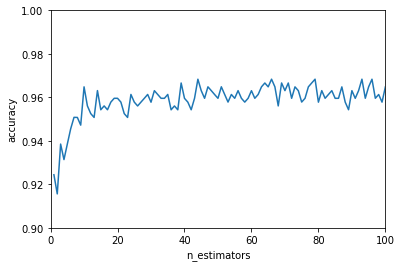

In [31]:
#ergebnisse von zuvor dann über matplotlib als graph darstellen
import matplotlib.pyplot as plt

scores = gs.cv_results_['mean_test_score']

plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

#ergebnis: bestes modell bei n_estimators=33 und =64
#dennoch: lieber möglichst kleinen wert nahe an bester performance nehmen 
#=> bei 10 noch performant (siehe graph)
#also: optimum=10 trees

In [32]:
#jetzt forest model mit unserem gefundenen(abgelesenen) wert 10 verwenden 
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y) 

RandomForestClassifier(n_estimators=10)

### Feature Importances
##### Feature Importances
- wahl der subsets für features wichtig => feature-Auswahl nötig
- Random Forests mit eigener feature-Auswahl über "mean decrease impurity"
- Scikit kann feature importances berechnen über .feature_importance
- Warum feature-Auswahl? - trainiert Modell schneller, macht Modell weniger komplex, macht es einfacher interpetierbar

In [36]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=101)
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

ft_imp = pd.Series(rf.feature_importances_, index=cancer_data.feature_names).sort_values(ascending=False)
print(ft_imp.head(10))

#feature importance wird absteigend gelistet (nutzt gini und entropy)
#bei 'regression' wird stattdessen die varianz genutzt

worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64


##### Neues Modell aus gewählten Features

In [37]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#start
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']
#end

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.965034965034965


In [39]:
#features mit dem wort 'worst' finden lassen
#wieder #start-#end prinzip
worst_cols = [col for col in df.columns if 'worst' in col]
print(worst_cols)

['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [42]:
#jetzt weiteren dataframe erstellen mit den zuvor gewählten 'worst'-features
#wieder #start-#end prinzip + von kurz zuvor vorausgehend
X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)

X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

#ergebnis: subset verbessert genauigkeit (hoch korrelierende features wurden dadurch eliminiert)

0.972027972027972


### Random Forest: Vor- und Nachteile

##### Leistung
- Vorteil: laufen gut auch ohne Tuning und gehen damit auf fast jedem Datenset sehr gut
- kann ein Datenset wegen einer gleichmäßigen Streuung im ganzen Koordinaten-Bereich nicht als lineares Modell realisiert werden, ist es auch nicht möglich, dieses durch eine Linie zu splitten (zumindest ohne die features zu manipulieren) => aber: ein Random Forest läuft super auf so einem Datenset

In [44]:
#funktion make_circles erstellt ein (imaginäres) klassifiziertes daten-set über konzentrische kreise
#ausgabe: welches modell besser performt: logistic regression oder random forest
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

kf = KFold(n_splits=5, shuffle=True, random_state=1)
lr_scores = []
rf_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_scores.append(lr.score(X_test, y_test))
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))
print("Logistic Regression accuracy:", np.mean(lr_scores))
print("Random Forest accuracy:", np.mean(rf_scores))

#beste methode für benchmark bei einem klassifizierungs-problem: 
#logistich regression oder random forest, beide optimal

Logistic Regression accuracy: 0.36
Random Forest accuracy: 0.8400000000000001


##### Interpretierbarkeit
- Random Forests bestehen aus Decision Trees und sind daher nicht leicht zu interpretieren
- bei Berechnung des Durchschnitts sind Random Forests allerdings perfekt
- geht es um Interpretierbarkeit, sollte man dennoch keinen Random Forest wählen

##### Rechenaufwand

- langsam bei vielen Bäumen im Random Forest
- Vorhersagen sind beim Random Forest jedoch langsamer als beim Decision Tree, da eine Vorhersage aufgrund der (je nach Anzahl der Bäume) 10-100 Decision Trees sehr lange dauert, bis die finale Vorhersage errechnet wurde
- schneller PC empfohlen!